### Récupération des données

Nous avons récupéré l'ensemble des posts sur la période janvier 2021 à décembre 2021. Nous avons utilisé l'outil stackexchange explorer afin de récupére l'ensemble des posts publiés entre janvier 2021 et décembre 2021. Il ne permet de récupérer que 50 000 entrée par requête SQL. Nous avons donc réalisé une requête sur l'ensembe de la période en veillant à ne pas dépasser 50000 entrées et qui ont les critères suivants:

  - Ayant un Score non nul
  - Ayant un nombre de vues non nul
  - Ayant un nombre de réponses non nul
  - Ayant un nombre de commentaires non nul
  - Ayant un nombre de mise en favoris non nul


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

query1 = pd.read_csv('QueryResults.csv')
query2 = pd.read_csv('QueryResults(1).csv')
query3 = pd.read_csv('QueryResults(2).csv')
query4 = pd.read_csv('QueryResults(3).csv')

In [30]:
result = pd.concat([query1, query2, query3, query4], axis=0)

In [31]:
result = result.set_index('Id')
result.head(5)

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
65526397,2021-01-01 00:01:40,0,55,1,0,1,R: search for the Right Seed(s) that Simulate ...,<p>I want <code>R</code> to search for the <co...,<r><search><arima>
65526401,2021-01-01 00:02:17,2,289,1,2,0,How do I make a class instance using user input?,<p>I am making a text based adventure game in ...,<python>
65526414,2021-01-01 00:04:32,2,62,0,9,0,HTTP request in NodeJs - Need help in understa...,<p>I am a new to nodejs/javascript and trying ...,<javascript><node.js>
65526420,2021-01-01 00:05:46,2,79,2,2,2,How to check if values in individiual rows of ...,<p>Suppose I have the following data.table:</p...,<r><data.table><rowwise>
65526430,2021-01-01 00:07:03,1,89,1,1,1,How to accelerate the speed of this pandas apply,"<p>Pandas masters, here I have a question for ...",<python><pandas><dask>


In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147307 entries, 65526397 to 70537838
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CreationDate   147307 non-null  object
 1   Score          147307 non-null  int64 
 2   ViewCount      147307 non-null  int64 
 3   AnswerCount    147307 non-null  int64 
 4   CommentCount   147307 non-null  int64 
 5   FavoriteCount  147307 non-null  int64 
 6   Title          147307 non-null  object
 7   Body           147307 non-null  object
 8   Tags           147307 non-null  object
dtypes: int64(5), object(4)
memory usage: 11.2+ MB


Nous pouvons constater un total de 10 colonnes et 147307 lignes, ainsi qu'aucunes valeurs manquantes.

## Analyse numérique

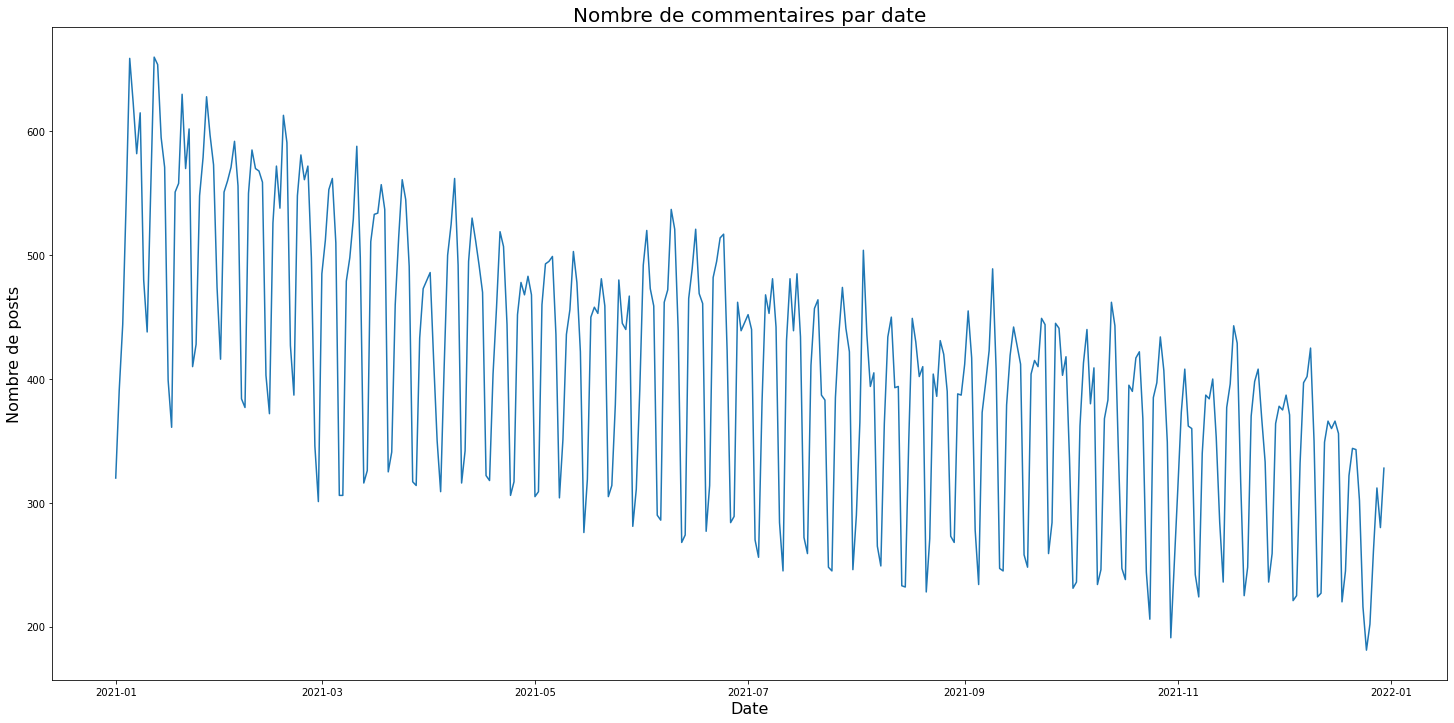

In [5]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,12))
CreationDateByDay = pd.to_datetime(result['CreationDate']).dt.date.value_counts()

sns.lineplot(data=CreationDateByDay, x=CreationDateByDay.index, y=CreationDateByDay.values, ax=ax)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Nombre de posts", fontsize=16)
ax.set_title("Nombre de commentaires par date", fontsize=20)

plt.show()

Nous pouvons en déduire une baisse d'activité sur la période sélectionnée.

Donc, filtrer les posts par date de création pénaliserait les publications les plus récentes et les thématiques qui y sont associées.

### Score

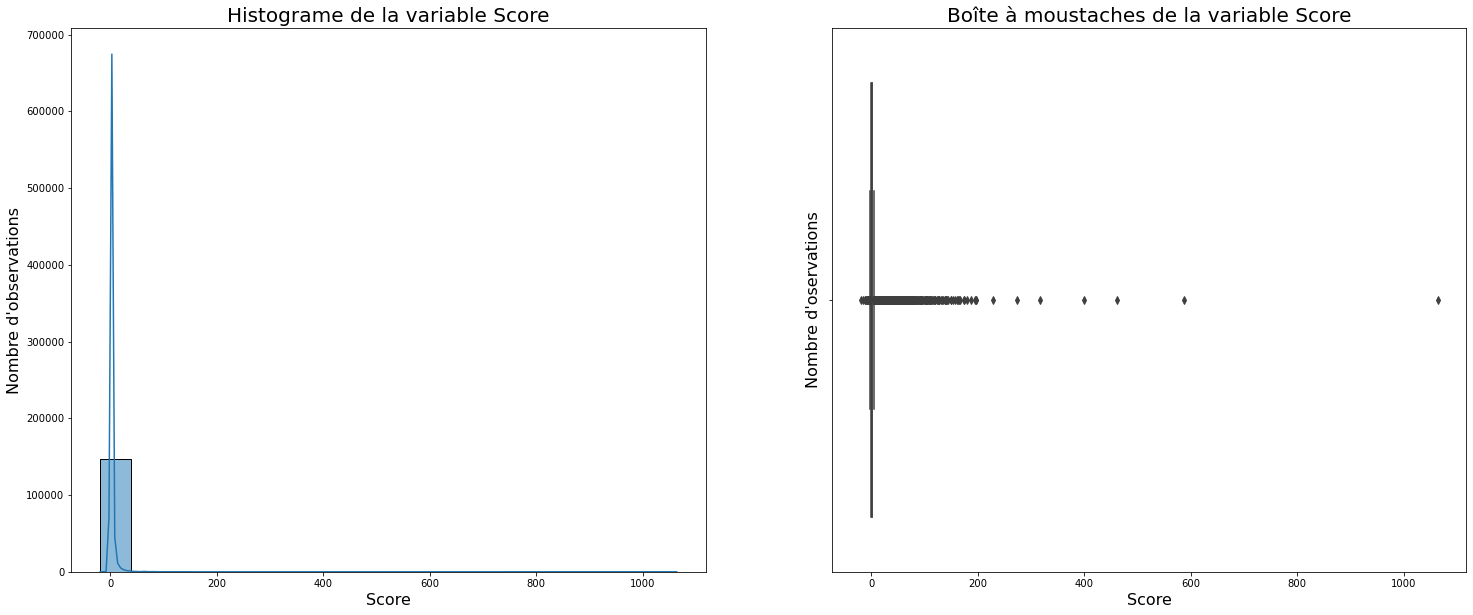


--------------------------------------------------

Indicateurs statistiques de distribution de la variable Score:


count    147307.000000
mean          1.552988
std           5.961680
min         -19.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1064.000000
Name: Score, dtype: float64

In [6]:
def plot_distribution(data, col, bins='sturges'):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    
    sns.histplot(data=data, x=col, bins='sturges', kde=True, ax=ax[0])
    ax[0].set_xlabel(f"{col}", fontsize=16)
    ax[0].set_ylabel("Nombre d'observations", fontsize=16)
    ax[0].set_title(f"Histograme de la variable {col}", fontsize=20)
    
    sns.boxplot(data=data, x=col)
    ax[1].set_xlabel(f"{col}", fontsize=16)
    ax[1].set_ylabel("Nombre d'oservations", fontsize=16)
    ax[1].set_title(f"Boîte à moustaches de la variable {col}", fontsize=20)
    plt.show()
    
    print("\n" + "-" * 50 + "\n")
    print(f"Indicateurs statistiques de distribution de la variable {col}:")
    display(data[col].describe())
    
    
plot_distribution(data=result, col='Score')

La distribution est centrée sur 1 avec une majorité d'observation comprise dans l'interquartile entre 0 et 2

### ViewCount

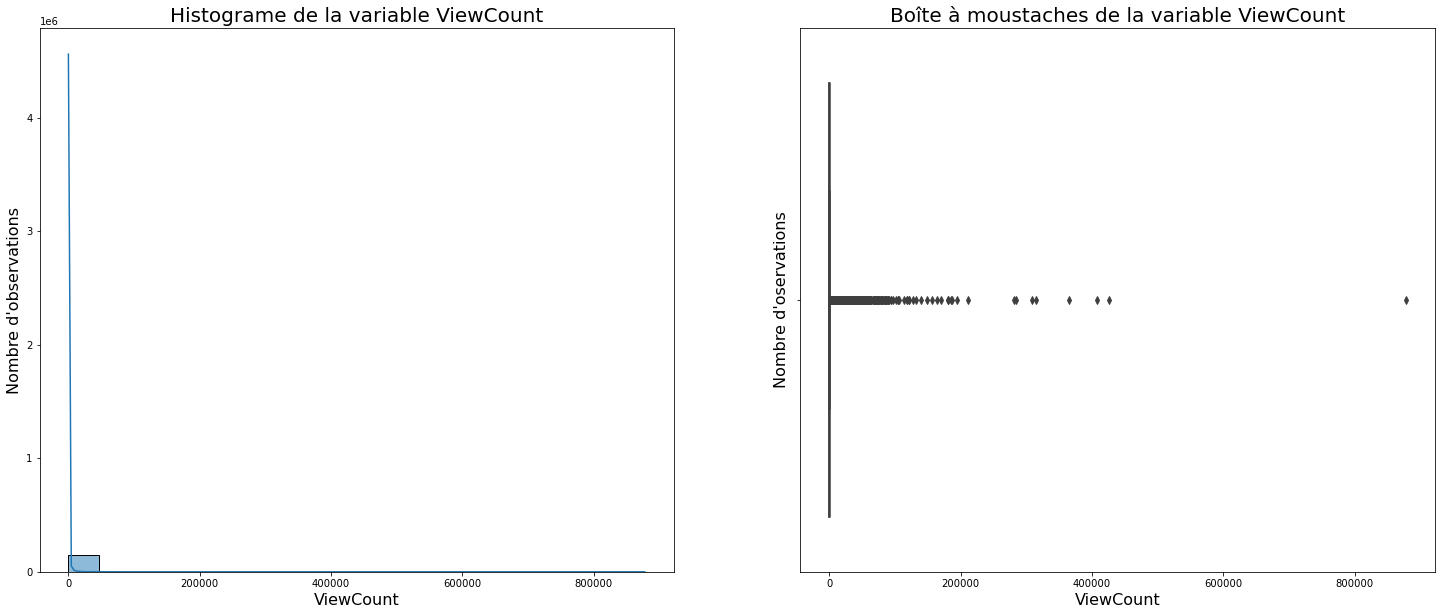


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCount:


count    147307.000000
mean        790.412961
std        4795.991490
min           5.000000
25%          68.000000
50%         152.000000
75%         449.000000
max      877924.000000
Name: ViewCount, dtype: float64

In [7]:
plot_distribution(data=result, col='ViewCount')

La distribution est centrée sur 152 avec une majorité d'observation comprise dans l'interquartile entre 68 et 449

### AnswerCount

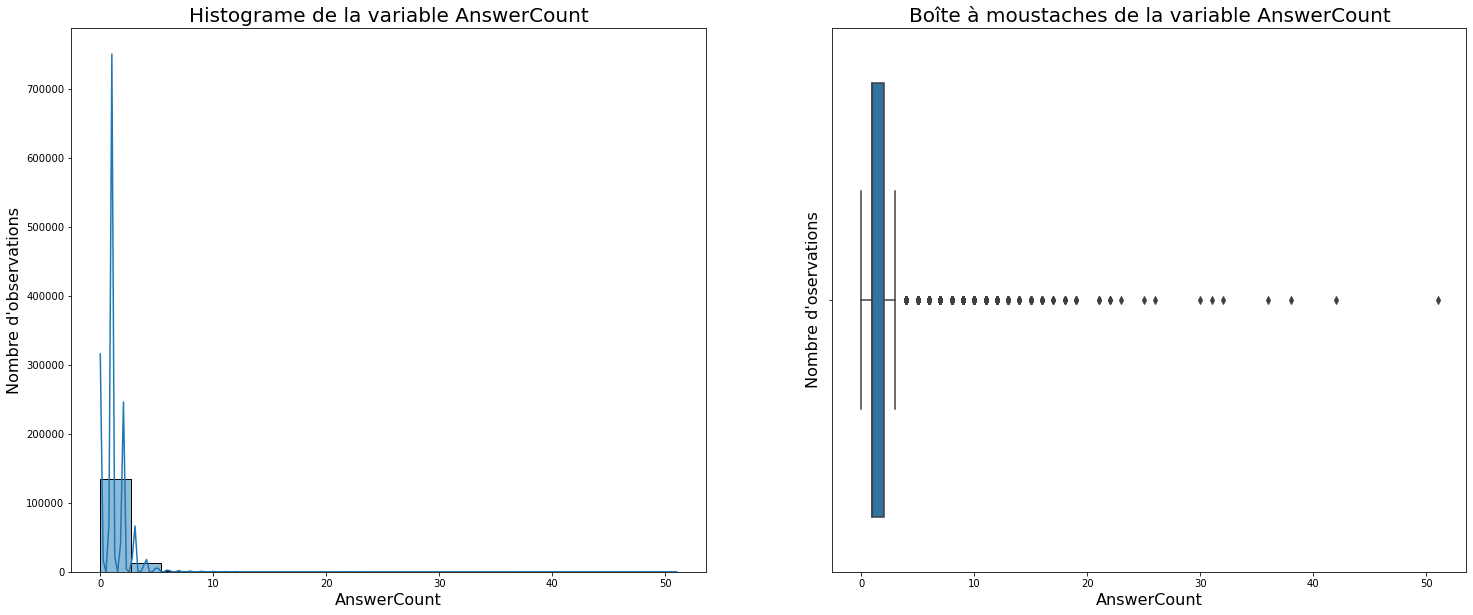


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    147307.000000
mean          1.220152
std           1.136378
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          51.000000
Name: AnswerCount, dtype: float64

In [8]:
plot_distribution(data=result, col='AnswerCount')

La distribution est centrée sur 1 avec une majorité d'observation comprise dans l'interquartile entre 1 et 2

### CommentCount

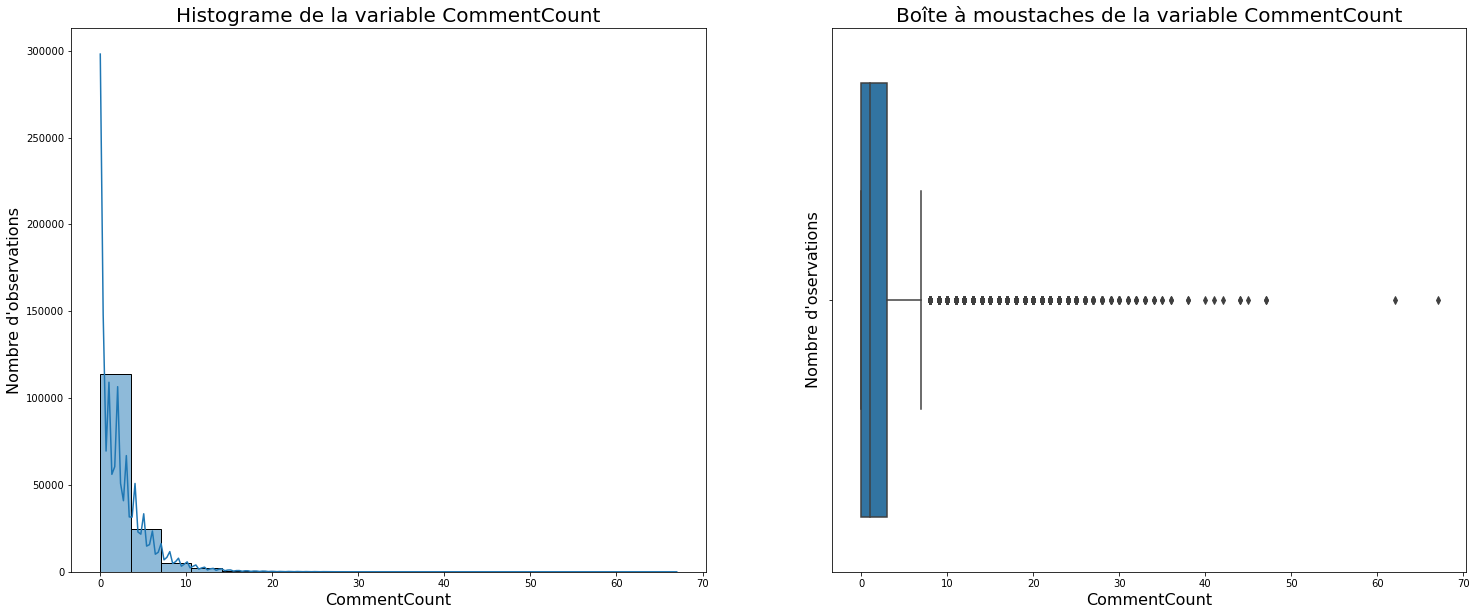


--------------------------------------------------

Indicateurs statistiques de distribution de la variable CommentCount:


count    147307.000000
mean          2.171431
std           2.989500
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          67.000000
Name: CommentCount, dtype: float64

In [9]:
plot_distribution(data=result, col='CommentCount')

La distribution est centrée sur 1 avec une majorité d'observation comprise dans l'interquartile entre 0 et 3

### FavoriteCount

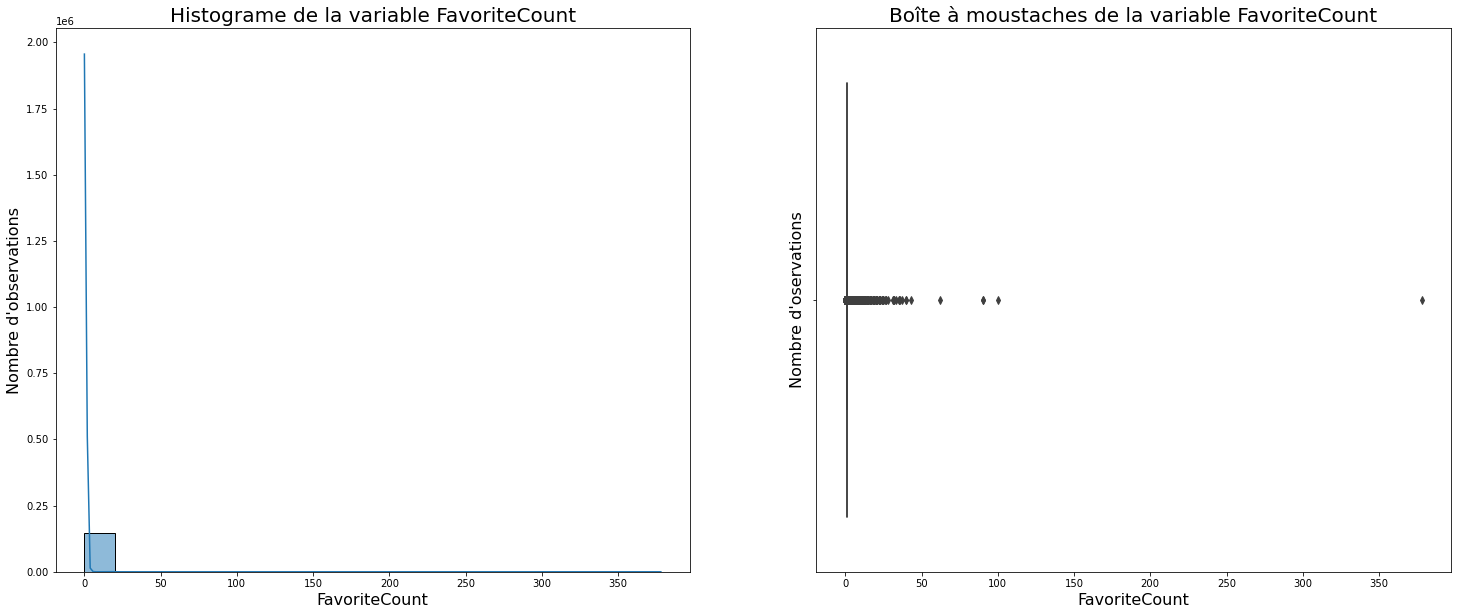


--------------------------------------------------

Indicateurs statistiques de distribution de la variable FavoriteCount:


count    147307.000000
mean          0.951767
std           1.436981
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         378.000000
Name: FavoriteCount, dtype: float64

In [10]:
plot_distribution(data=result, col='FavoriteCount')

La majorité des observations est situées autour de 1. Regardons maintenant les observations supérieures

In [11]:
fav_count_filter = result[result["FavoriteCount"]>1].copy()
print(f"Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {fav_count_filter.shape[0]}")
print(f"Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {round(fav_count_filter.shape[0]/result.shape[0]*100,2)}%")

Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 15366
Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 10.43%


### Analyse Bivariée

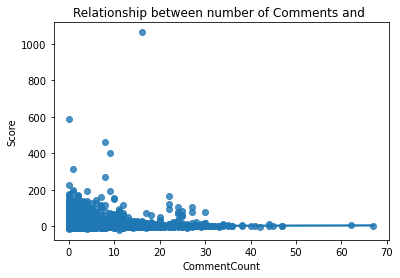

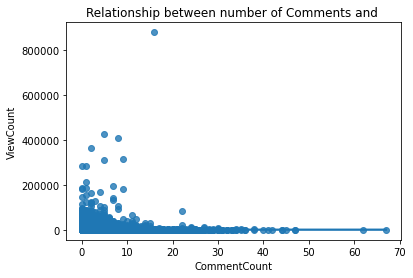

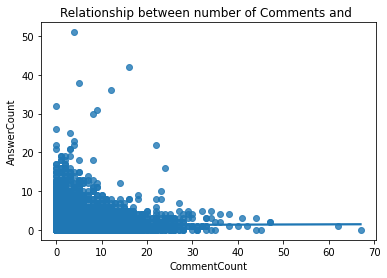

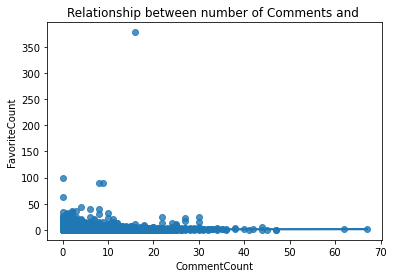

In [12]:
result_num = result.select_dtypes(include=['int64','float64'])
result_num = result_num.drop(columns={'CommentCount'})
labels = ['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']
labels = labels[0].lower()
y_pos = np.arange(len(labels))
for boucle in result_num :
    sns.regplot(x="CommentCount", y=boucle, data=result)
    plt.title("Relationship between number of Comments and " )
    plt.show()

### Correlation

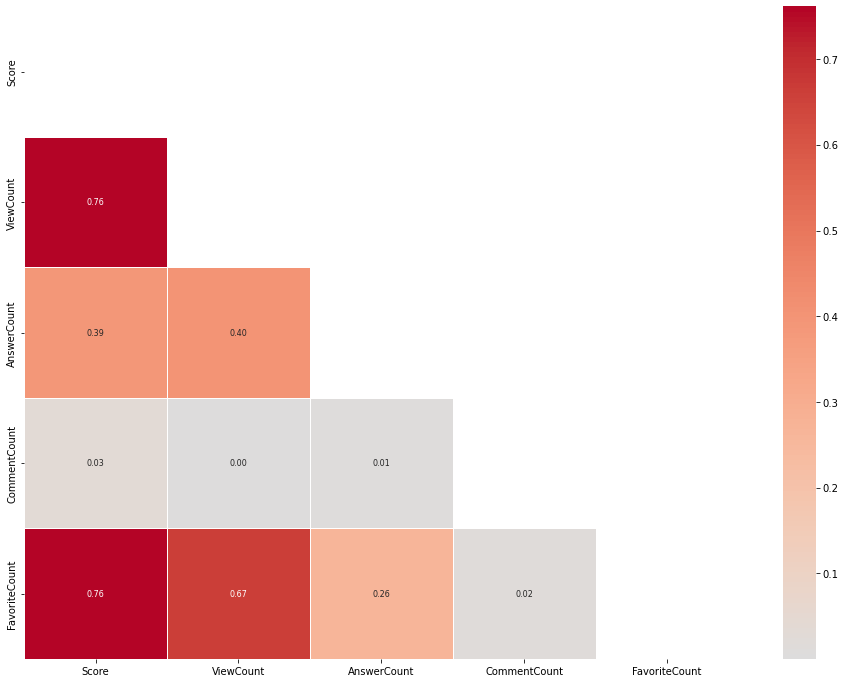

In [13]:
corr = result.corr()
diag = np.zeros_like(corr)
diag[np.triu_indices_from(diag)] = True
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, fmt=".2f", annot_kws={'size':8}, annot=True, linewidths=.5, ax=ax, center=0, mask=diag, cmap='coolwarm')
plt.show()

On peut remarquer une corrélation assez marqué entre Score et View, ainsi qu'avec Score et Favorite.


## Analyse Text

In [32]:
result_text = result.select_dtypes(exclude=['int64','float64'])
result_text = result_text.drop(columns={'CreationDate'})
result_text = result_text.reset_index()
result_text.head(5)

result_text.to_csv('result_text')

### Constitution du corpus

Nous commençons par créer une nouvelle variable associant le titre (Title) et le corps du texte (Body)


In [33]:
%%time
result_text['Post'] = result_text.apply(lambda x: x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body'], axis=1)
corpus = result_text['Post'].to_list()
tags = result_text['Tags'].to_list()

print("Dix première observations")
display(result_text.head(10))

print("Premier élément de la liste corpus\n")
display(corpus[0])
print("\n")

print("Premier éléments de la liste tags\n")
display(tags[0])

print(f"Occurences dans le corpus: {len(corpus)}")
print(f"Occurences dans les tags: {len(tags)}")

Dix première observations


,Id,Title,Body,Tags,Post
0,65526397,R: search for the Right Seed(s) that Simulate ...,<p>I want <code>R</code> to search for the <co...,<r><search><arima>,R: search for the Right Seed(s) that Simulate ...
1,65526401,How do I make a class instance using user input?,<p>I am making a text based adventure game in ...,<python>,How do I make a class instance using user inpu...
2,65526414,HTTP request in NodeJs - Need help in understa...,<p>I am a new to nodejs/javascript and trying ...,<javascript><node.js>,HTTP request in NodeJs - Need help in understa...
3,65526420,How to check if values in individiual rows of ...,<p>Suppose I have the following data.table:</p...,<r><data.table><rowwise>,How to check if values in individiual rows of ...
4,65526430,How to accelerate the speed of this pandas apply,"<p>Pandas masters, here I have a question for ...",<python><pandas><dask>,How to accelerate the speed of this pandas app...
5,65526447,React Router v5.2 - Blocking route change with...,<p>My app has two pages: <code>Step1</code> an...,<javascript><reactjs><react-router><react-rout...,React Router v5.2 - Blocking route change with...
6,65526459,How can I make this code faster in Python?,"<pre><code>input_numbers=list(map(int,input()....",<python><performance>,How can I make this code faster in Python? <pr...
7,65526490,Is there a C macro that replaces varied length...,<p>I want to be able to:</p>\n<pre><code>#defi...,<c><macros>,Is there a C macro that replaces varied length...
8,65526500,intellisense vscode not showing parameters nor...,<p>I'm trying to migrate my entire workflow fr...,<python><visual-studio-code><intellisense>,intellisense vscode not showing parameters nor...
9,65526518,Flutter Firebase how to control notification n...,<p>I had a flutter app with a chat room featur...,<ios><flutter><notifications><firebase-cloud-m...,Flutter Firebase how to control notification n...


Premier élément de la liste corpus



'R: search for the Right Seed(s) that Simulate AR(2) with its Coefficients(phi_1 and phi_2) <p>I want <code>R</code> to search for the <code>seed(s)</code> that will <code>simulate</code> `AR(2):</p>\n<pre><code>ar1.2 &lt;- arima.sim(n = 100, model=list(ar=c(0.5, 0.4), order = c(2, 0, 0)), sd = 1)\n</code></pre>\n<p>Such that when I run the following:</p>\n<pre><code>set.seed()\nar1.2 &lt;- arima.sim(n = 100, model=list(ar=c(0.5, 0.4), order = c(2, 0, 0)), sd = 1)\nauto.arima(ar1.2)\n</code></pre>\n<p>It will confirm the <code>AR- coefficients</code> as <code>phi_1 = 0.5...</code> and <code>phi_2 = 0.4...</code></p>\n<p>I have two conditions to be met chronologically as follows:</p>\n<ol>\n<li>Make sure that the <code>ARIMA order</code> is <code>(2, 0, 0)</code></li>\n<li>Out of the <code>seeds</code> that satisfied <code>condition 1</code> above, <code>search</code> for the one that its coefficients as <code>0.5...</code> and <code>0.4...</code></li>\n</ol>\n<p><strong>Edit</strong></



Premier éléments de la liste tags



'<r><search><arima>'

Occurences dans le corpus: 147307
Occurences dans les tags: 147307
CPU times: total: 2.5 s
Wall time: 2.5 s


### Nettoyage HTML

Nous constatons que les contenus importés comportent un nombre importante de balise HTML. Nous créeons une fonction afin de les retirer.


In [34]:
%%time

def clean_html(text):
    """
    Remove HTML from a text.
    
    Args:
        text(String): Row text with html 
             
    Returns:
        cleaned String
    """
    import lxml
    import html5lib
    from bs4 import BeautifulSoup
 
    soup = BeautifulSoup(text, "html5lib")

    for sent in soup(['style', 'script']):
            sent.decompose()
   
        
    return ' '.join(soup.stripped_strings)

corpus_wo_html = [clean_html(text) for text in corpus]

print("Premier élément de la liste corpus sans html\n")
display(corpus_wo_html[0])
print("\n")

print(f"Occurences dans le corpus: {len(corpus_wo_html)}")

Premier élément de la liste corpus sans html



'R: search for the Right Seed(s) that Simulate AR(2) with its Coefficients(phi_1 and phi_2) I want R to search for the seed(s) that will simulate `AR(2): ar1.2 <- arima.sim(n = 100, model=list(ar=c(0.5, 0.4), order = c(2, 0, 0)), sd = 1) Such that when I run the following: set.seed()\nar1.2 <- arima.sim(n = 100, model=list(ar=c(0.5, 0.4), order = c(2, 0, 0)), sd = 1)\nauto.arima(ar1.2) It will confirm the AR- coefficients as phi_1 = 0.5... and phi_2 = 0.4... I have two conditions to be met chronologically as follows: Make sure that the ARIMA order is (2, 0, 0) Out of the seeds that satisfied condition 1 above, search for the one that its coefficients as 0.5... and 0.4... Edit It is done for `AR(1) as follows: FUN <- function(i) {\n  set.seed(i)\n  ar1 <- arima.sim(n=100, model=list(ar=0.4, order=c(1, 0, 0)), sd=1)\n  ar2 <- auto.arima(ar1, ic="aicc")\n  c(arimaorder(ar2), seed=i)\n}\n\nR <- 24000  ## this would be your 1e5\nseedv <- 23000:R\n\nlibrary(parallel)\ncl <- makeCluster(detec



Occurences dans le corpus: 147307
CPU times: total: 5min 45s
Wall time: 5min 45s


### Nettoyage du texte

Pour les besoin des traitemment futurs et entrainements des modèles, nous avons besoins de passer les textes en minuscule. Nous en profitons pour ne conserver que les caractères alphabétiques et ne garder que les termes de plus de trois lettres. Le filtrage sur la taille des termes permet de retirer ceux qui sont générique liés au code (if, for …). Il reste toutefois perfectible puisqu’il élimine les occurrences de certains langages (C, C++, C#, R… ).


In [35]:
%%time

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text. 
    
    Args:
        text(String): Row text to clean
        
    Returns:
       res(string): Cleaned text
    """
    import re
    
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text
    
    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res))
    res = " ".join(res)
    return res

cleaned_corpus = [text_cleaning(text) for text in corpus_wo_html]
cleaned_tags = [text_cleaning(text).strip() for text in tags]


print("Premier élément de la liste cleaned_corpus\n")
display(cleaned_corpus[0])
print("\n")

print("Premier élément de la liste cleaned_tags\n")
display(cleaned_tags[0])
print("\n")

print(f"Occurences dans le corpus nettoyé: {len(cleaned_corpus)}")
print(f"Occurences dans les tags nettoyés: {len(cleaned_tags)}")

Premier élément de la liste cleaned_corpus



'search right seed that simulate with coefficients want search seed that will simulate arima model list order such that when following seed arima model list order auto arima will confirm coefficients have conditions chronologically follows make sure that arima order seeds that satisfied condition above search that coefficients edit done follows function seed arima model list order auto arima aicc arimaorder seed this would your seedv library parallel makecluster detectcores clusterexport envir environment clusterevalq suppresspackagestartupmessages library forecast parsapply seedv stopcluster seed seed which apply function sink arima arima order results data frame seed seed seed seed arima model list order auto arima aicc data frame coef substr character cbind data frame seed seed print arima order results bind rows arima order results write seed paste names false sink output your working directory seed seed intercept seed seed confirm output with seed seed arima model list order libra



Premier élément de la liste cleaned_tags



'search arima'



Occurences dans le corpus nettoyé: 147307
Occurences dans les tags nettoyés: 147307
CPU times: total: 32 s
Wall time: 32 s


### Tokenization

La tokenisation permet de transformer les textes passés en entrée en liste de termes distincts (token). Pendant le traitement les termes génériques (stop words) ne sont pas conservés dans la liste des tokens.


In [36]:
%%time
def tokenize(text):
    """
    Tokenize words of a text.
    
    Args:
    
        text(String): Row text
        
    Returns
    
        res(list): Tokenized string.
    """
    
    from nltk.corpus import stopwords
    from nltk import word_tokenize
    from nltk.tokenize import sent_tokenize

    stop_words = set(stopwords.words('english'))
    
    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    res = [token for token in res if token not in stop_words]
    return res

tokenized_corpus = [tokenize(text) for text in cleaned_corpus]
tokenized_tags = [tokenize(text) for text in cleaned_tags]

print("Premier élément de la liste tokenized_corpus\n")
display(tokenized_corpus[0])
print("\n")
print(f"Longueur du premier éléments de liste tokenized_corpus: {len(tokenized_corpus[0])}")
print("\n")

print("Premier élément de la liste tokenized_tags\n")
display(tokenized_tags[0])
print('\n')


print(f"Occurences dans le corpus tokenizé: {len(tokenized_corpus)}")
print(f"Occurences dans la liste des tags: {len(tokenized_tags)}")

Premier élément de la liste tokenized_corpus



['search',
 'right',
 'seed',
 'simulate',
 'coefficients',
 'want',
 'search',
 'seed',
 'simulate',
 'arima',
 'model',
 'list',
 'order',
 'following',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'confirm',
 'coefficients',
 'conditions',
 'chronologically',
 'follows',
 'make',
 'sure',
 'arima',
 'order',
 'seeds',
 'satisfied',
 'condition',
 'search',
 'coefficients',
 'edit',
 'done',
 'follows',
 'function',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'aicc',
 'arimaorder',
 'seed',
 'would',
 'seedv',
 'library',
 'parallel',
 'makecluster',
 'detectcores',
 'clusterexport',
 'envir',
 'environment',
 'clusterevalq',
 'suppresspackagestartupmessages',
 'library',
 'forecast',
 'parsapply',
 'seedv',
 'stopcluster',
 'seed',
 'seed',
 'apply',
 'function',
 'sink',
 'arima',
 'arima',
 'order',
 'results',
 'data',
 'frame',
 'seed',
 'seed',
 'seed',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'aicc',
 'd



Longueur du premier éléments de liste tokenized_corpus: 139


Premier élément de la liste tokenized_tags



['search', 'arima']



Occurences dans le corpus tokenizé: 147307
Occurences dans la liste des tags: 147307
CPU times: total: 2min 15s
Wall time: 2min 15s


NLTK propose des listes de stop words génériques. Nous attirons l’attention sur le fait que le corpus utilisé pour les travaux est de nature spécifique. En effet les posts contiennent souvent du code, des messages d’erreur de compilateurs / interpréteurs ou des logs alors qu’aucune liste de stop words mis à disposition ne porte sur le thématique. Le risque est de laisser passer des termes génériques vis-à-vis du contexte étudié. Sans allouer un important temps de travail il s’avère difficile de construire une liste de stop words spécifique exhaustive.


### Lemmatisation

Afin d’éviter d’utiliser de multiples déclinaisons d’un même terme (conjugaisons, féminin, pluriel …). Les deux méthodes les couramment utilisées sont le stemming et la lemmatisation. Elles consistent toutes deux à dédupliquer les déclinaisons de termes en ne conservant que leur racine. Le stemming procède par troncature simple. De manière générale cette méthode peut poser un problème car plusieurs mots termes sémantiquement différents peuvent avoir la même racine (stem). La lemmatisation consiste à identifier la racine sémantique (lemme) d’un terme référencé dans un corpus ou un dictionnaire d’une langue. Cette méthode évite, a priori, l’écueil de diminuer le nombre de termes ayant un stem identique mais des lemmes différents. Nous retenons donc la lemmatisation. Par contre une fois encore nous sommes confrontés à la généricité des outils mis à disposition par NLTK. A titre d’exemple, “keras” (Framework de deep learning) devient “kera” une fois lemmatisé.


In [38]:
%%time
def lemmatization(tokens):
    """
    Transform tokens into lems 
    
    Args:
        tokens(list): List of tokens
        
    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    import nltk
    from nltk.stem import WordNetLemmatizer
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        
    return lemmatized

lemmatized_corpus = [lemmatization(tokens) for tokens in tokenized_corpus]
lemmatized_tags = [lemmatization(tokens) for tokens in tokenized_tags]

tags_wo_blanks = []
for tokens in lemmatized_tags:
    tokens = [token for token in tokens if len(token)>1]
    tags_wo_blanks.append(tokens)

print("Premier élément de la liste lemmatized_corpus\n")
display(lemmatized_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste lemmatized_corpus: {len(lemmatized_corpus[0])}")
print("\n")

print("Premier élément de la liste lemmatized_tags\n")
display(tags_wo_blanks[0])


print(f"Occurences dans le corpus lemmatisé: {len(lemmatized_corpus)}")
print(f"Occurences dans les tags lemmatisés: {len(tags_wo_blanks)}")

Premier élément de la liste lemmatized_corpus



['search',
 'right',
 'seed',
 'simulate',
 'coefficient',
 'want',
 'search',
 'seed',
 'simulate',
 'arima',
 'model',
 'list',
 'order',
 'following',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'confirm',
 'coefficient',
 'condition',
 'chronologically',
 'follows',
 'make',
 'sure',
 'arima',
 'order',
 'seed',
 'satisfied',
 'condition',
 'search',
 'coefficient',
 'edit',
 'done',
 'follows',
 'function',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'aicc',
 'arimaorder',
 'seed',
 'would',
 'seedv',
 'library',
 'parallel',
 'makecluster',
 'detectcores',
 'clusterexport',
 'envir',
 'environment',
 'clusterevalq',
 'suppresspackagestartupmessages',
 'library',
 'forecast',
 'parsapply',
 'seedv',
 'stopcluster',
 'seed',
 'seed',
 'apply',
 'function',
 'sink',
 'arima',
 'arima',
 'order',
 'result',
 'data',
 'frame',
 'seed',
 'seed',
 'seed',
 'seed',
 'arima',
 'model',
 'list',
 'order',
 'auto',
 'arima',
 'aicc',
 'data',




Longueur du premier éléments de liste lemmatized_corpus: 139


Premier élément de la liste lemmatized_tags



['search', 'arima']

Occurences dans le corpus lemmatisé: 147307
Occurences dans les tags lemmatisés: 147307
CPU times: total: 54.6 s
Wall time: 54.6 s


### Filtrage des valeurs vides

Les premiers traitements on généré des docuements vides. Nous décidons de filtrer le corpus pour les éliminer.


In [39]:
print(f"Observations restante du corpus original: {result_text.shape[0]}")

joined_corpus = [" ".join(text) for text in lemmatized_corpus]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in tags_wo_blanks]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[(corpus_tag_df['len_text']==0) | (corpus_tag_df['len_tags']==0)].index

corpus_tag_df.drop(index=empty_data_idx, inplace=True)
result_text.drop(index=empty_data_idx, inplace=True)

print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")

corpus_tag_df['splitted_text'] = (corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') ))
corpus_tag_df['splitted_tags'] = (corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') ))

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = result_text['Post'].to_list()

filtered_tokenized_vs_original = pd.concat([result_text['Post'],
                                            corpus_tag_df['splitted_text'], 
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)
corpus_tag_df.to_csv('corpus_tag_df')

Observations restante du corpus original: 147307
observations restantes du corpus traité: 143542


In [40]:

with open('tags_wo_blanks.json', 'w') as file :
    json.dump(tags_wo_blanks, file)


### Fréquence de distribution tokens

Nous observons à présent la fréquence de distribution des tokens.


In [41]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution
    
    Args:
        Corpus(List of lists): Original corpus
    
    Returns:
        
        word_dist_df(DataFrame): Word distribution of the corpus
    """
    
    from nltk import FreqDist
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

word_dist = build_word_distribution(filtered_corpus)
#word_dist = remove_stopwords(word_dist)
print(f"Nombre de tokens du corpus {word_dist.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist.head(20))

Nombre de tokens du corpus 489462
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
data,141798
name,139470
class,131369
file,131305
value,119372
error,116542
code,104957
return,103814
user,99581


CPU times: total: 10.1 s
Wall time: 10.1 s


Nous constatons un nombre important de termes génériques tels que : class, error, value, ...


In [42]:
word_dist['percent'] = round((word_dist['Frequency'] * 100)/word_dist['Frequency'].sum(),2)
word_dist.sort_values('percent', ascending=False)
word_dist.head(20)

,Frequency,percent
Word,,
data,141798,0.76
name,139470,0.74
class,131369,0.70
file,131305,0.70
value,119372,0.64
error,116542,0.62
code,104957,0.56
return,103814,0.55
user,99581,0.53


### Fréquence de distribution des tags

Nous réalisons le même traitement sur les tags.


In [43]:
tag_dist = build_word_distribution(filtered_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist.head(20))
print(f"Nombre de tags: {len(tag_dist)}")
first_200_tags = tag_dist[0:200].index.to_list()
with open('first_200_tags.json', 'w') as file :
    json.dump(first_200_tags, file)

Top 20 des tags les plus utilisés


,Frequency
Word,
python,30058
javascript,15738
android,12423
java,11582
reactjs,7894
azure,7310
google,7206
html,5692
react,5692


Nombre de tags: 12188


### filtrage top 200 tags

Pour les besoin des entrainements des modèles supervisés, nous avons besoin limiter le nombre de tags. Nous décidons de ne retenir que les 200 premiers.

In [44]:
print(f"Observations restantes dans le corpus original: {result_text.shape[0]}")
filtered_corpus_tag_df = corpus_tag_df.copy()
filtered_corpus_tag_df['tags_in_top200'] = filtered_corpus_tag_df['splitted_tags'].apply(lambda tags: [tag for tag in tags if tag in first_200_tags])

filtered_corpus_tag_df['len_tags_in_top200'] = filtered_corpus_tag_df['tags_in_top200'].apply(lambda x: len(x))
missing_filtered_data = filtered_corpus_tag_df[filtered_corpus_tag_df['len_tags_in_top200'] == 0].index

filtered_corpus_tag_df.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le corpus traité: {filtered_corpus_tag_df.shape[0]}")

top200_corpus = filtered_corpus_tag_df['splitted_text'].to_list()
top200_joined_corpus = filtered_corpus_tag_df['preprocessed_text'].to_list()
top200_tags = filtered_corpus_tag_df['tags_in_top200'].to_list()
with open('top200_tags.json', 'w') as file :
    json.dump(top200_tags, file)
with open('top200_joined_corpus.json', 'w') as file :
    json.dump(top200_joined_corpus, file)

Observations restantes dans le corpus original: 143542
Observations restantes dans le corpus traité: 128481


### Fréquences de distribution des tokens après filtrage du top 200 tags

Nous souhaitons à nouveau appréhender la distribution des tokens sur le corpus filtré.


In [45]:
word_dist_top200 = build_word_distribution(top200_corpus)
print(f"Nombre de tokens du corpus {word_dist_top200.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist_top200.head(20))
print("Nombre des tokens ayant plus de 1000 occurences sur le corpus filtré")
word_dist_top200[word_dist_top200["Frequency"]>=1000].shape[0]

Nombre de tokens du corpus 444495
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
data,130781
name,129284
class,123259
file,117822
value,109264
error,105405
return,95232
code,94531
user,92638


Nombre des tokens ayant plus de 1000 occurences sur le corpus filtré


2007

Nous constatons que le filtrage par top 200 tags a changé le classement des tokens les plus représenté.


### Fréquences de distribution des tags après filtrage du top 200 tags

Nous réalisons le même traitement sur les tags.


In [46]:
tag_dist_top_200 = build_word_distribution(top200_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist_top_200.head(20))
print(f"Nombre de tags: {len(tag_dist_top_200)}")

Top 20 des tags les plus utilisés


,Frequency
Word,
python,30058
javascript,15738
android,12423
java,11582
reactjs,7894
azure,7310
google,7206
react,5692
html,5692


Nombre de tags: 200


## TF-IDF

Afin de pouvoir entraîner les modèles nous avons besoin de transformer les listes de tokens lemmatisés en vecteurs. Deux méthodes sont couramment utilisées :

   - Bag of words : Chaque liste de token (appelée document) est transformée en un vecteur indiquant la fréquence brute de chaque terme du corpus dans la liste.
   - TF-IDF : Dans cette méthode, la fréquence brute d’un token est remplacée par un indicateur composé de sa fréquence d’apparition du token dans le document et la fréquence inverse du nombre de documents où le token apparaît. Tel que TF-IDF=TF ×log⁡〖|D|/|{d_j ∶ t_i∈d_j }| 〗 avec |D| : le nombre total de documents dans le corpus et |{d_j ∶ t_i∈d_j }| : le nombre de documents ou le token apparaît. Cette méthode permet de minorer les tokens présents dans un nombre élevé de documents et de normaliser la taille des documents. Les documents contenant des termes très génériques et de longueurs très variables, nous avons décidé d’utiliser une vectorisation par TF-IDF pour la suite des travaux. Afin de de ne garder que les tokens les plus représentatifs, nous avons entrainé les modèles de vectorisation sur des dictionnaire de correspondance (vocabulary) ne comportant que des termes dont la fréquence est supérieure à 1000 occurrences dans le corpus.



In [47]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = list(word_dist_top200[word_dist_top200["Frequency"]>=1000].index)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(top200_joined_corpus)
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.head(10))
tfidf_data.to_csv('tfidf_data', index=False)

print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")
    
filename_vocabulary = 'vocabulary.pkl'
pickle.dump(vocabulary, open(filename_vocabulary,'wb'))
import pickle
filename_tfidf_vectorizer = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(filename_tfidf_vectorizer,'wb'))



Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,data,name,class,file,value,error,return,code,user,java,...,dataframes,destroy,blazor,cipher,half,food,printstacktrace,animated,provides,smaller
0,0.047725,0.016214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.217976,0.155651,0.000000,0.000000,0.000000,0.035300,0.000000,0.125233,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036422,0.000000,0.000000,0.000000,0.075583,0.247969,0.036071,0.122689,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.366561,0.000000,0.000000,0.000000,0.190169,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.201532,0.000000,0.011686,0.159571,0.000000,0.021758,0.037003,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046854,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.117761,0.000000,0.000000,0.000000,0.093224,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.035367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.116121,0.000000,0.000000,0.000000,0.200809,0.000000,0.038334,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Nombre d'observations: 128481, nombre de variables: 2007
CPU times: total: 1min 47s
Wall time: 1min 47s


### Réduction des données

La vectorisation a transformé les documents en un vecteur de 1016 composantes. Afin de casser les corrélations entre celles-ci et optimiser le temps d’entrainement des modèles en réduisant les dimensions nous réalisons une ACP (Analyse en Composantes Principales).


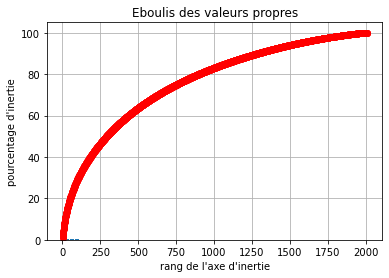

In [48]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(tfidf_data)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid(True)
    plt.show(block=False)

display_scree_plot(pca)

A défaut d’un coude significatif dans la visualisation l’éboulis des composantes principales, nous utilisons un hyper paramètre consistant à retenir un nombre de vecteurs permettant de conserver 85% d’inertie.

In [49]:
pca = PCA(n_components=0.85, random_state=42)
pca.fit(tfidf_data)
print(f"Nombre de composantes principales: {pca.components_.shape[0]}")

Nombre de composantes principales: 1073
